## Business Problem

## Import Packages

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer

### Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Import Data

In [3]:
df=pd.read_csv('E:/DataTrained\Intership_Flip Robo/Projects/Cause of Death/archive/cause_of_deaths dataset.csv')

In [4]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [5]:
#  This will enable us to see truncated columns
pd.set_option('display.max_columns',None) 
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


## Data Inspection

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

###### Data types is correct for the features but i will change year to categorical for better analysis

In [7]:
df['Year']=df.Year.astype('object')

In [8]:
# Check Duplicated records
df.duplicated().sum()

0

###### There are no duplicated records

In [9]:
# Check the null values
df.isna().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [10]:
df.isin(['NAN','NA','N/A','-',' ','?']).sum().any()

False

###### There are no null values

In [11]:
# Check the number of uniques countries 
df['Country/Territory'].nunique()

204

In [12]:
# Check the number of uniques code
df['Code'].nunique()

204

In [13]:
# Drop Code feature as it same as coutries so will be multicollinarity
df.drop('Code',axis=1,inplace=True)

In [14]:
# split  data to continous and categorical varaiables.
df1_cont=df.select_dtypes(include=['float64','int64'])
df1_cat=df.select_dtypes(include=['object'])

In [15]:
# Descriptive analysis for continous data
df1_cont.apply(continuous_var_summary)

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
N,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03,6.120000e+03
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SUM,1.052457e+07,2.976884e+07,7.179795e+06,1.379203e+07,2.534268e+07,1.030200e+07,1.275284e+07,7.727046e+06,3.636442e+07,2.656121e+06,4.585060e+07,4.477420e+08,8.377004e+07,7.686073e+07,4.819018e+06,2.371393e+07,1.490132e+06,6.623551e+07,1.788851e+06,2.297585e+08,3.294053e+06,3.144887e+07,2.891169e+07,2.601082e+06,1.203188e+07,3.629647e+07,1.046053e+08,3.747932e+07,6.563864e+07,3.602914e+06,3.784791e+06
MEAN,1.719701e+03,4.864189e+03,1.173169e+03,2.253600e+03,4.140960e+03,1.683333e+03,2.083797e+03,1.262589e+03,5.941899e+03,4.340067e+02,7.491929e+03,7.316045e+04,1.368791e+04,1.255894e+04,7.874212e+02,3.874825e+03,2.434856e+02,1.082280e+04,2.922959e+02,3.754224e+04,5.382440e+02,5.138705e+03,4.724133e+03,4.250134e+02,1.965994e+03,5.930796e+03,1.709237e+04,6.124072e+03,1.072527e+04,5.887114e+02,6.184299e+02
MEDIAN,1.090000e+02,6.665000e+02,1.640000e+02,1.190000e+02,0.000000e+00,1.770000e+02,2.650000e+02,5.400000e+01,1.360000e+02,2.000000e+01,4.170000e+02,1.174200e+04,2.126500e+03,9.160000e+02,8.000000e+01,5.330000e+02,0.000000e+00,2.965000e+02,2.100000e+01,5.629500e+03,0.000000e+00,1.087000e+03,8.220000e+02,5.250000e+01,9.200000e+01,9.665000e+02,1.689000e+03,1.210000e+03,2.185000e+03,1.260000e+02,1.500000e+01
STD,6.672007e+03,1.822066e+04,4.616156e+03,1.048363e+04,1.842775e+04,8.877018e+03,6.917006e+03,6.057973e+03,2.101196e+04,2.898762e+03,3.954998e+04,2.915775e+05,4.803172e+04,5.605837e+04,3.545824e+03,1.842562e+04,4.717104e+03,6.541617e+04,1.704466e+03,1.615584e+05,7.033308e+03,1.677308e+04,1.647043e+04,2.022641e+03,8.255999e+03,2.409778e+04,1.051572e+05,2.068812e+04,3.722805e+04,2.128595e+03,4.186023e+03
VAR,4.451568e+07,3.319924e+08,2.130890e+07,1.099066e+08,3.395821e+08,7.880146e+07,4.784497e+07,3.669904e+07,4.415026e+08,8.402819e+06,1.564201e+09,8.501746e+10,2.307046e+09,3.142540e+09,1.257287e+07,3.395033e+08,2.225107e+07,4.279276e+09,2.905206e+06,2.610111e+10,4.946742e+07,2.813362e+08,2.712751e+08,4.091075e+06,6.816152e+07,5.807032e+08,1.105803e+10,4.279983e+08,1.385928e+09,4.530917e+06,1.752279e+07
MIN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
P1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

###### It seems alot of outliers or skewness are in the data

In [16]:
df1_cat.describe(include=['O'])

,Country/Territory,Year
count,6120,6120
unique,204,30
top,Afghanistan,1990
freq,30,204


-------------------------------------------------------------------------------------------------------------------------------

KstestResult(statistic=0.8829688223001868, pvalue=0.0)


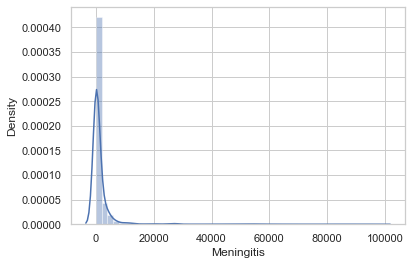

KstestResult(statistic=0.9661337620990889, pvalue=0.0)


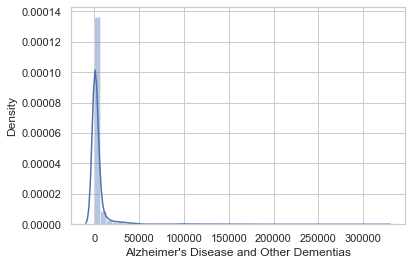

KstestResult(statistic=0.9471795137330757, pvalue=0.0)


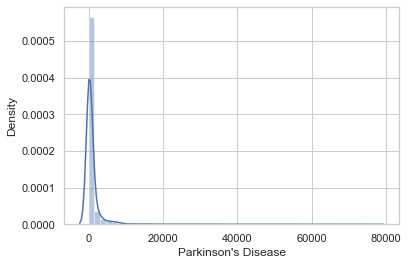

KstestResult(statistic=0.8811714366792718, pvalue=0.0)


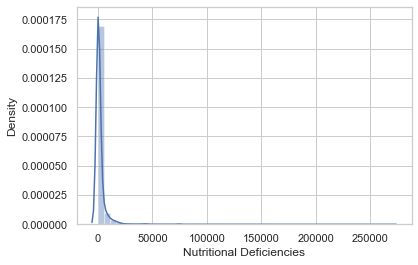

KstestResult(statistic=0.5, pvalue=0.0)


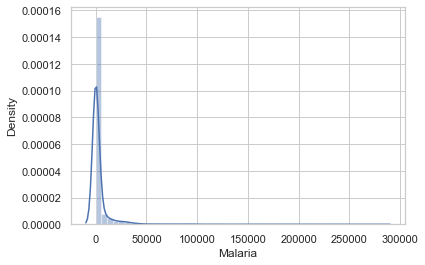

KstestResult(statistic=0.9483233045827489, pvalue=0.0)


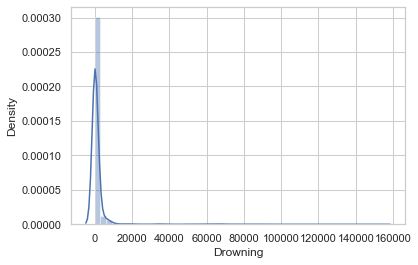

KstestResult(statistic=0.9432579451056248, pvalue=0.0)


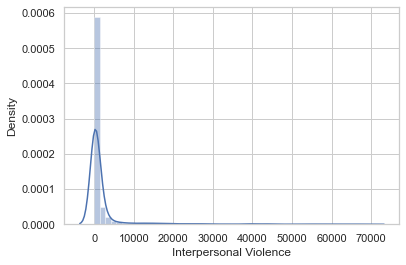

KstestResult(statistic=0.8373805870060691, pvalue=0.0)


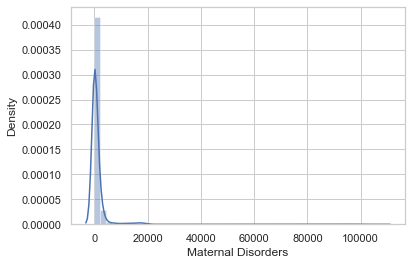

KstestResult(statistic=0.8888511752413633, pvalue=0.0)


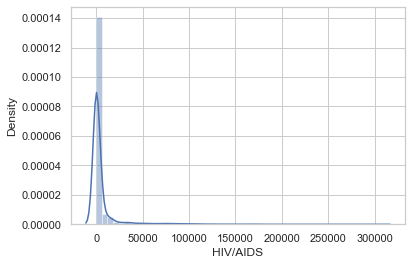

KstestResult(statistic=0.7891779726269842, pvalue=0.0)


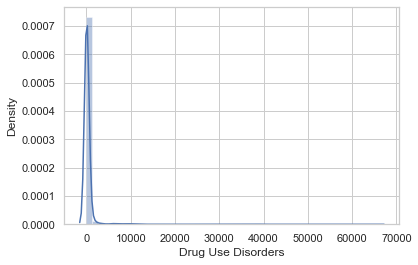

KstestResult(statistic=0.9063298405304614, pvalue=0.0)


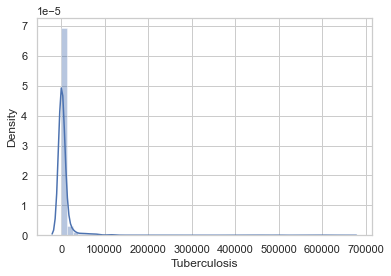

KstestResult(statistic=0.9999683287581669, pvalue=0.0)


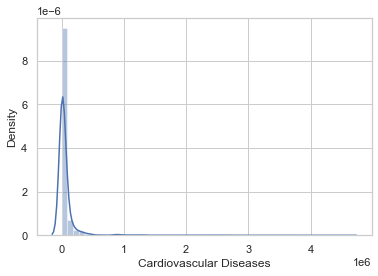

KstestResult(statistic=0.9901644071895395, pvalue=0.0)


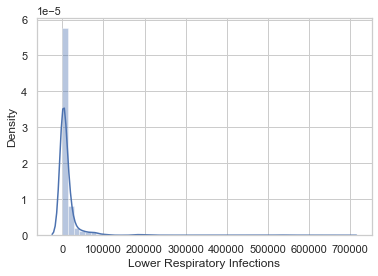

KstestResult(statistic=0.9586174222298078, pvalue=0.0)


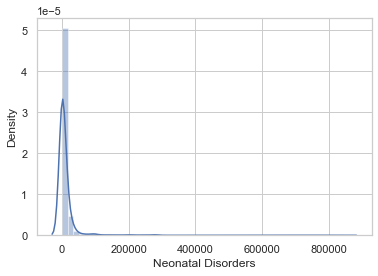

KstestResult(statistic=0.8803544432152195, pvalue=0.0)


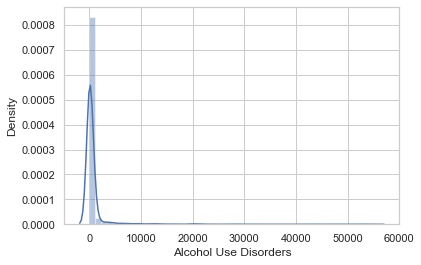

KstestResult(statistic=0.967604350334383, pvalue=0.0)


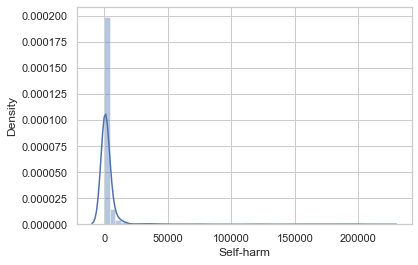

KstestResult(statistic=0.5, pvalue=0.0)


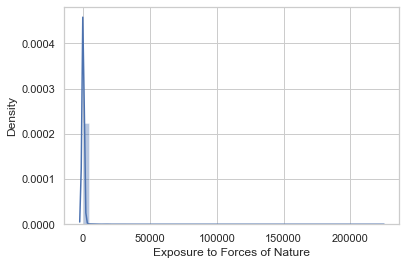

KstestResult(statistic=0.9086224170714287, pvalue=0.0)


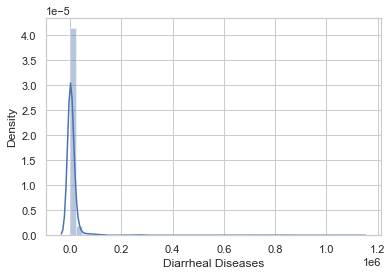

KstestResult(statistic=0.7628707830845005, pvalue=0.0)


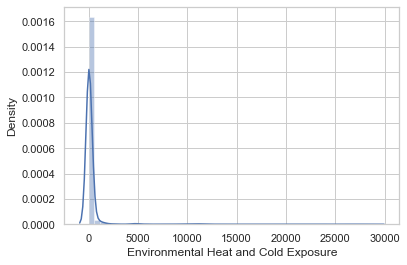

KstestResult(statistic=0.9937481411840562, pvalue=0.0)


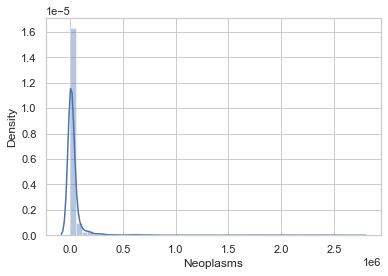

KstestResult(statistic=0.5, pvalue=0.0)


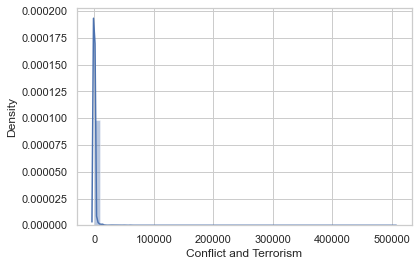

KstestResult(statistic=0.9919507555631412, pvalue=0.0)


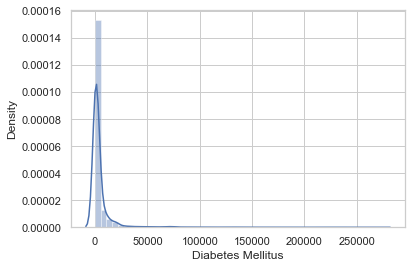

KstestResult(statistic=0.9849246117722915, pvalue=0.0)


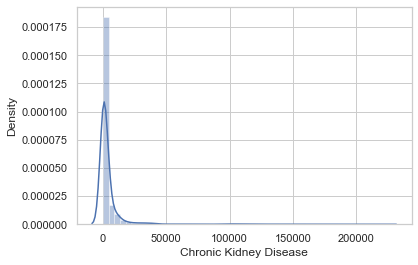

KstestResult(statistic=0.8133609791629319, pvalue=0.0)


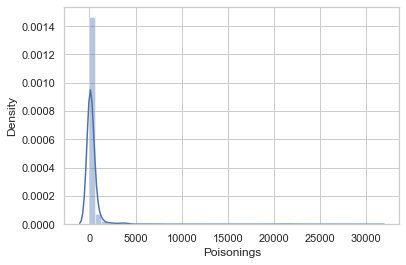

KstestResult(statistic=0.8520864693590103, pvalue=0.0)


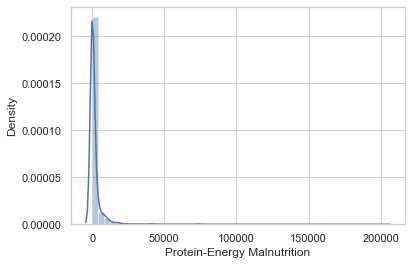

KstestResult(statistic=0.9829638274585659, pvalue=0.0)


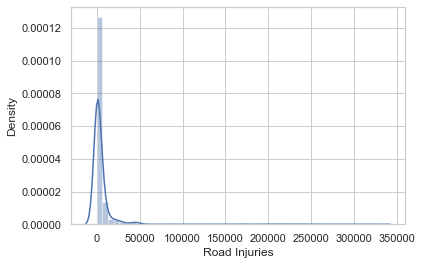

KstestResult(statistic=0.9890206163398663, pvalue=0.0)


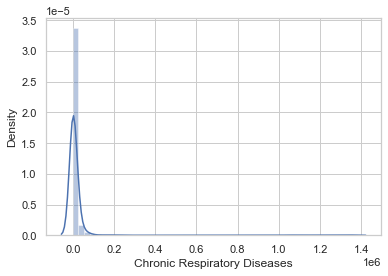

KstestResult(statistic=0.9738135006611803, pvalue=0.0)


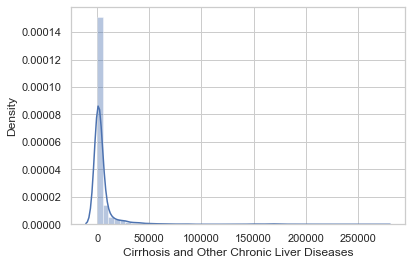

KstestResult(statistic=0.9878657882428797, pvalue=0.0)


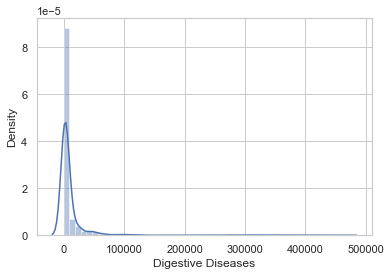

KstestResult(statistic=0.895550521646592, pvalue=0.0)


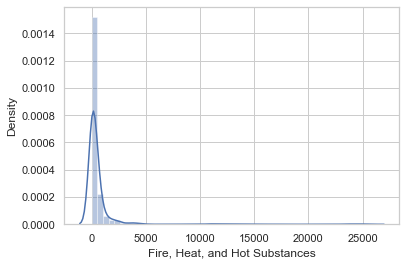

KstestResult(statistic=0.75551784190803, pvalue=0.0)


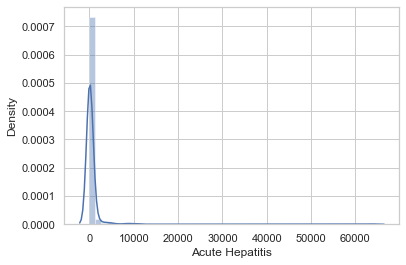

In [17]:
# Check Normality of continous data
for i in df1_cont.columns:
    sns.distplot(df1_cont[i])
    print(kstest(df1_cont[i].values,'norm'))
    plt.show()

###### All of the features are not follow the NDs ( Right Skewed ) as it shown in both graphs and Statistics

In [18]:
df1_cont.skew()

Meningitis                                     8.248599
Alzheimer's Disease and Other Dementias        8.695288
Parkinson's Disease                            9.321242
Nutritional Deficiencies                      14.863496
Malaria                                        9.159105
Drowning                                      10.553901
Interpersonal Violence                         5.777146
Maternal Disorders                            12.278358
HIV/AIDS                                       6.610169
Drug Use Disorders                            13.367100
Tuberculosis                                  12.022406
Cardiovascular Diseases                        9.411914
Lower Respiratory Infections                   9.036604
Neonatal Disorders                            10.447536
Alcohol Use Disorders                          9.253511
Self-harm                                      8.973653
Exposure to Forces of Nature                  34.507640
Diarrheal Diseases                            12

In [19]:
df2=df.copy()

In [20]:
# The unique Year data in the Dataframe

df1_cat['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=object)

###### There are 30 years of statistics in this data set (1990-2019).

In [21]:
# Creating a new column for 'Total_no_of_Deaths' for individual Country and Year

df2['Total_no_of_Deaths'] = df2.sum(axis=1)

In [22]:
df2

,Country/Territory,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_no_of_Deaths
0,Afghanistan,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816,194795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,2015,1439,754,215,3019,2518,770,1302,1355,29162,104,11214,16649,12974,9278,48,2235,16,5102,37,11161,13,3176,2108,381,2990,2373,2751,1956,4202,632,146,130080
6116,Zimbabwe,2016,1457,767,219,3056,2050,801,1342,1338,27141,110,10998,16937,13024,9065,49,2296,31,5002,37,11465,6,3259,2160,393,3027,2436,2788,1962,4264,648,146,128274
6117,Zimbabwe,2017,1460,781,223,2990,2116,818,1363,1312,24846,115,10762,17187,12961,8901,50,2338,251,4948,37,11744,5,3313,2196,398,2962,2473,2818,2007,4342,654,144,126515
6118,Zimbabwe,2018,1450,795,227,2918,2088,825,1396,1294,22106,121,10545,17460,12860,8697,51,2372,0,4745,37,12038,9,3381,2240,400,2890,2509,2849,2030,4377,657,139,123506


## EDA

### Univariate analysis

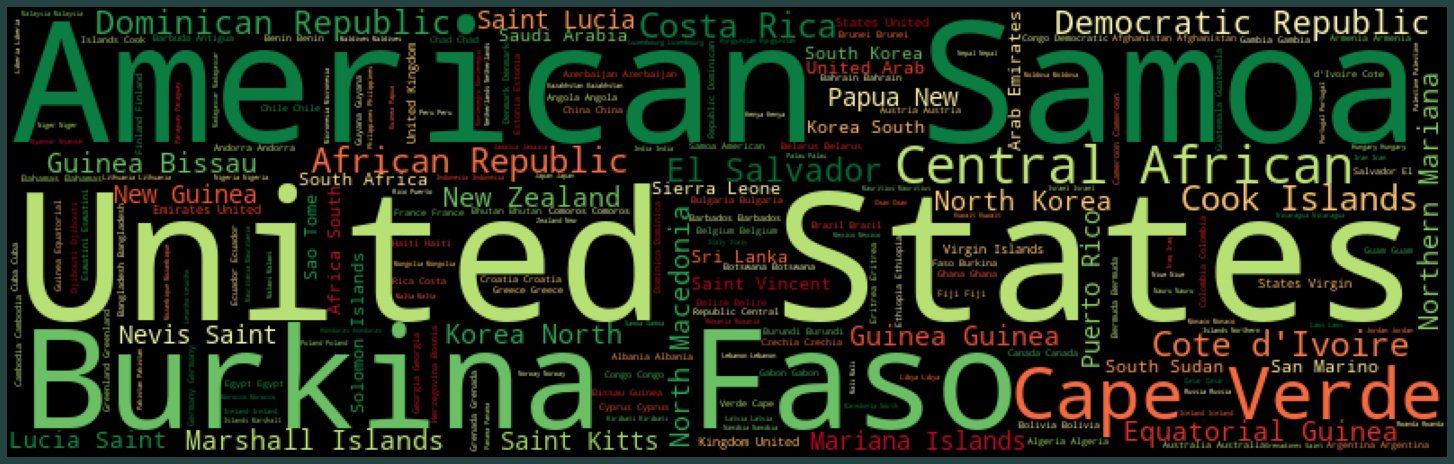

In [23]:
text = " ".join(subject_titles for subject_titles in df1_cat["Country/Territory"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

## Bivariate analysis

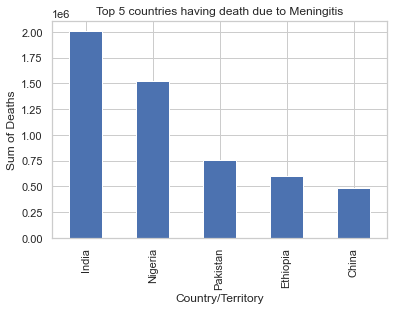

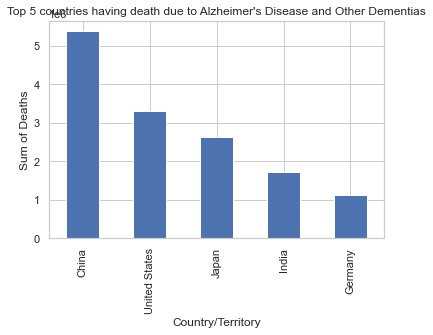

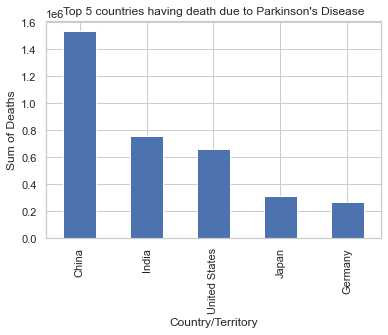

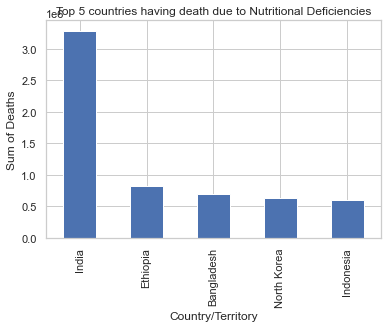

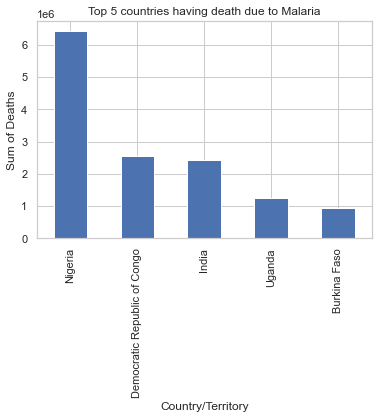

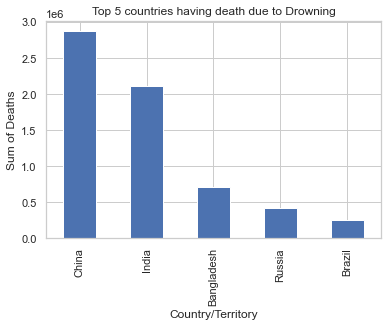

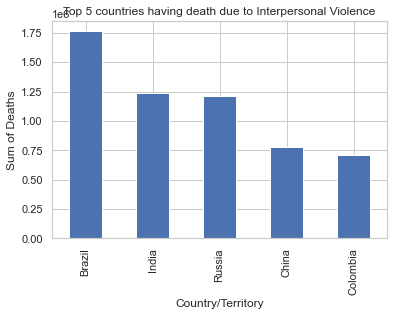

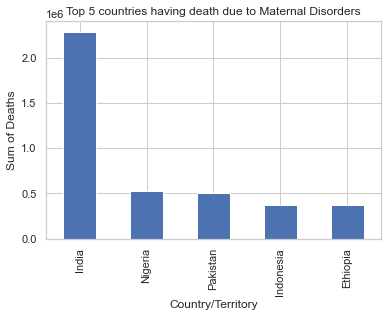

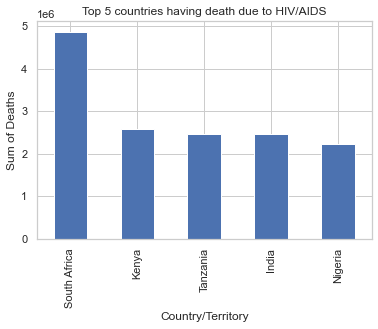

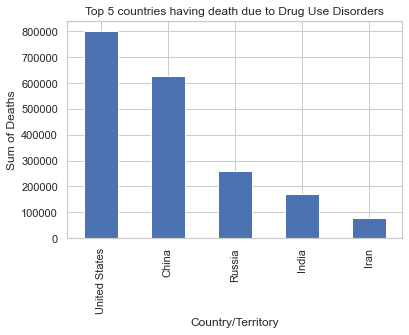

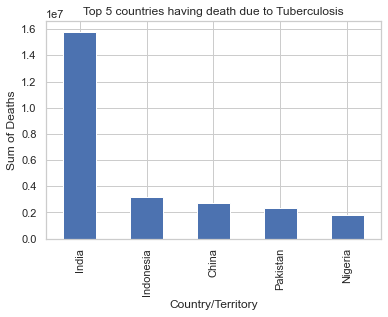

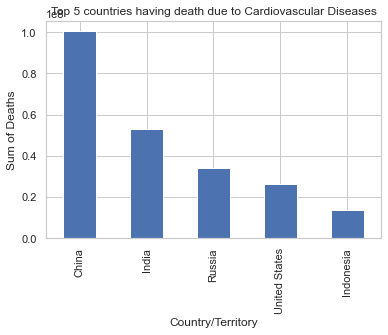

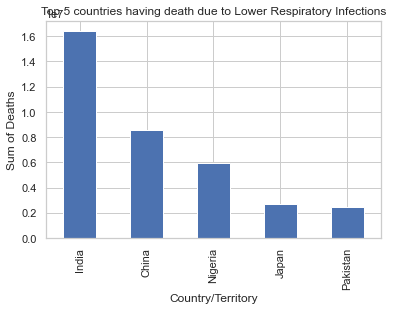

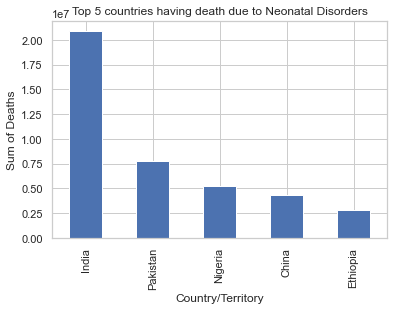

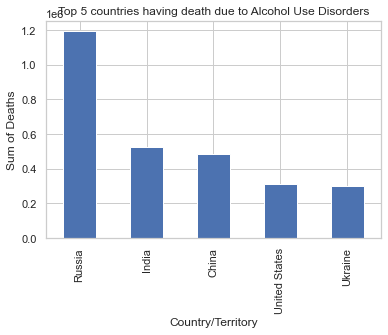

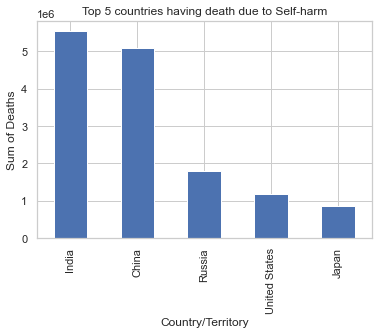

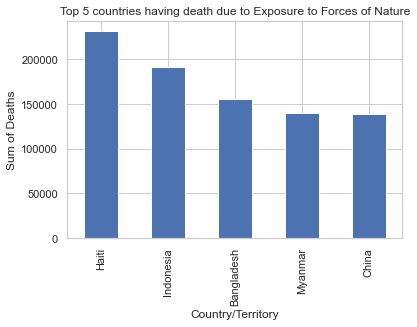

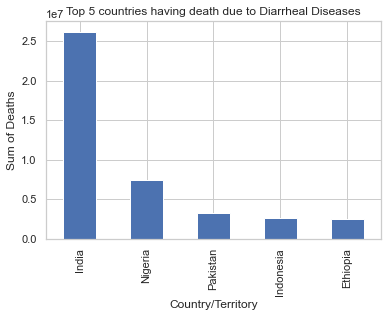

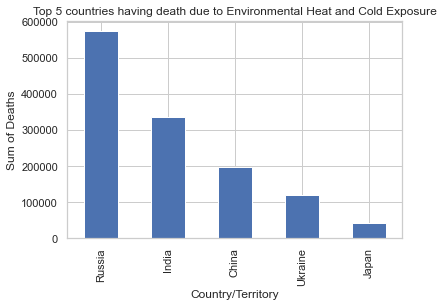

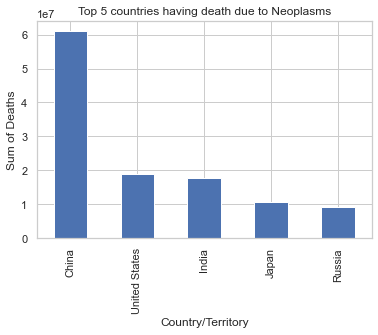

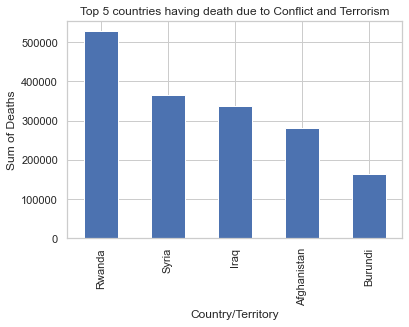

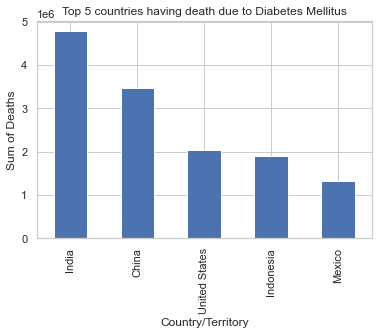

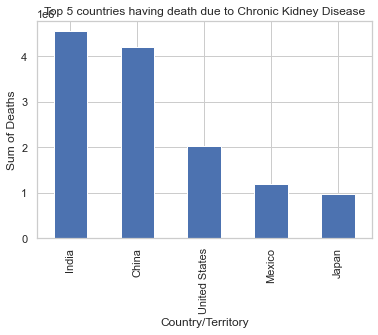

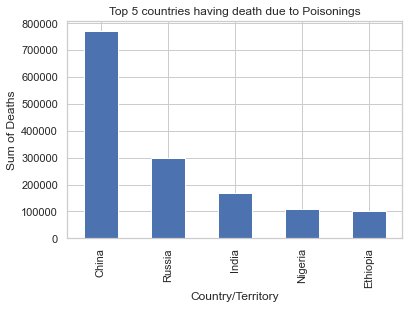

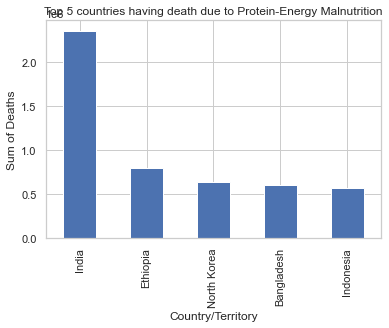

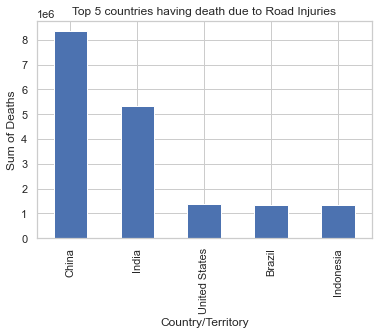

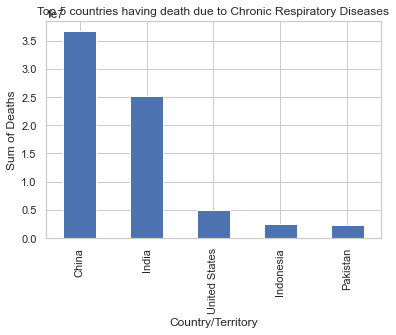

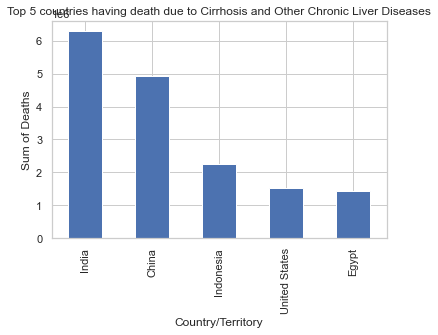

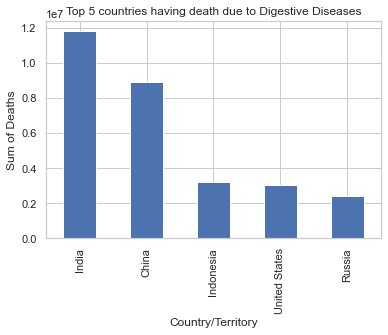

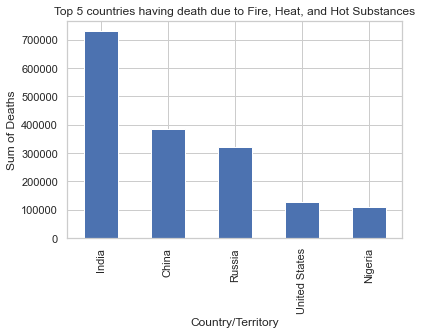

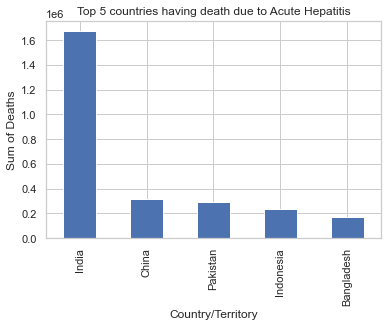

In [24]:
for i in df1_cont.columns:
    df2.groupby('Country/Territory')[i].sum().sort_values(ascending=False).head().plot(kind='bar')
    plt.title('Top 5 countries having death due to '+i)
    plt.ylabel('Sum of Deaths')
    plt.show()

In [25]:
# Top countries in different death disease/enviroment  from above graphs
# India---- Meningits, Nutritional Deficiencies, Maternal Disorders, Tuberculosis, Lower Respiratory Infections, Self-harm
# Neonatal Disorders,Diarrheal Diseases, Diabetes Mellitus,Choronic kidney,Protein-energy malnutrition,Digestive,Acute Hepatitis
# Cirrhosis & other chronic liver, Fire/heat & hot substances

# China---- Alzheimer, Parkinson, Drowning, Cardiovascular Diseases, Neoplasms, Poisonings, Road injuries, Chronic respiratory
# Nigeria---- Malaria
# Brazil---- Interpersonal Violence
# South Africa---- HIV/AIDS
# USA---- Drug use Disorders
# Russia---- Alcohol use Disorders, Environmental Heat&cold exposure
# Haiti---- Exposure to forces of nature
# Rwanda---- Conflict & Terrorism

<AxesSubplot:ylabel='Country/Territory'>

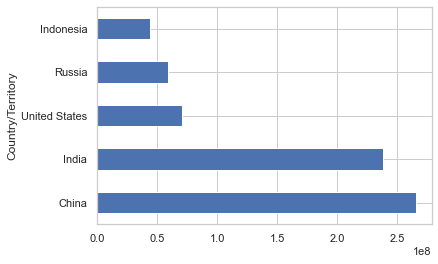

In [29]:
df2.groupby('Country/Territory')['Total_no_of_Deaths'].sum().sort_values(ascending=False).head().plot(kind='barh')
plt.show()

------------------------------------------------------------------------------------------------------------------------------

In [48]:
# Divide the causes of death into 3 main categories:

communicable_diseases_df = df2[["Year", "Nutritional Deficiencies", "Malaria", "Maternal Disorders", "HIV/AIDS","Drug Use Disorders","Tuberculosis","Neonatal Disorders","Alcohol Use Disorders","Diarrheal Diseases"]]

non_communicable_diseases_df = df2[["Year", "Meningitis","Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 
"Cardiovascular Diseases","Lower Respiratory Infections", "Acute Hepatitis", "Digestive Diseases", "Cirrhosis and Other Chronic Liver Diseases", 
"Chronic Respiratory Diseases", "Diabetes Mellitus","Chronic Kidney Disease"]]

injures_df = df2[["Year","Drowning", "Interpersonal Violence", "Fire, Heat, and Hot Substances", "Road Injuries", "Poisonings" ,
"Protein-Energy Malnutrition", "Conflict and Terrorism", "Self-harm", "Exposure to Forces of Nature", 
"Environmental Heat and Cold Exposure"]]

communicable_diseases_df = df.assign(sumRow = communicable_diseases_df.sum(axis=1) - communicable_diseases_df['Year']) 
sum_by_year_communicable_diseases_df = communicable_diseases_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

non_communicable_diseases_df = non_communicable_diseases_df.assign(sumRow = non_communicable_diseases_df.sum(axis=1) - non_communicable_diseases_df['Year'])
sum_by_year_non_communicable_diseases_df = non_communicable_diseases_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

injures_df = injures_df.assign(sumRow = injures_df.sum(axis=1) - injures_df['Year']) 
sum_by_year_injures_df = injures_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

sum_by_year_df = sum_by_year_communicable_diseases_df.merge(sum_by_year_non_communicable_diseases_df, on='Year').merge(sum_by_year_injures_df,on='Year')
sum_by_year_df.rename(columns={'sumRow_x': 'communicable_diseases', 'sumRow_y': 'non_communicable_diseases', 'sumRow': 'injures'}, inplace=True)

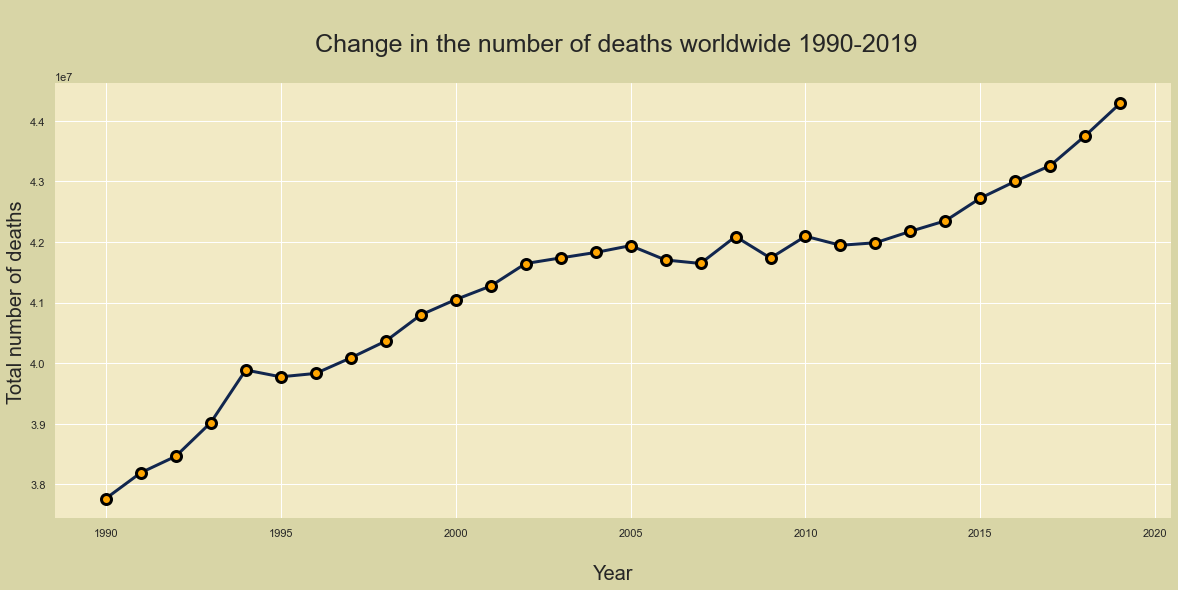

In [49]:
#  "Total_no_of_Deaths" against "Year"

sum_by_year_df["Total"]=sum_by_year_df["communicable_diseases"]+sum_by_year_df["non_communicable_diseases"]+sum_by_year_df["injures"]
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=sum_by_year_df["Year"] ,y=sum_by_year_df["Total"],data=sum_by_year_df,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Change in the number of deaths worldwide 1990-2019\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total number of deaths",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

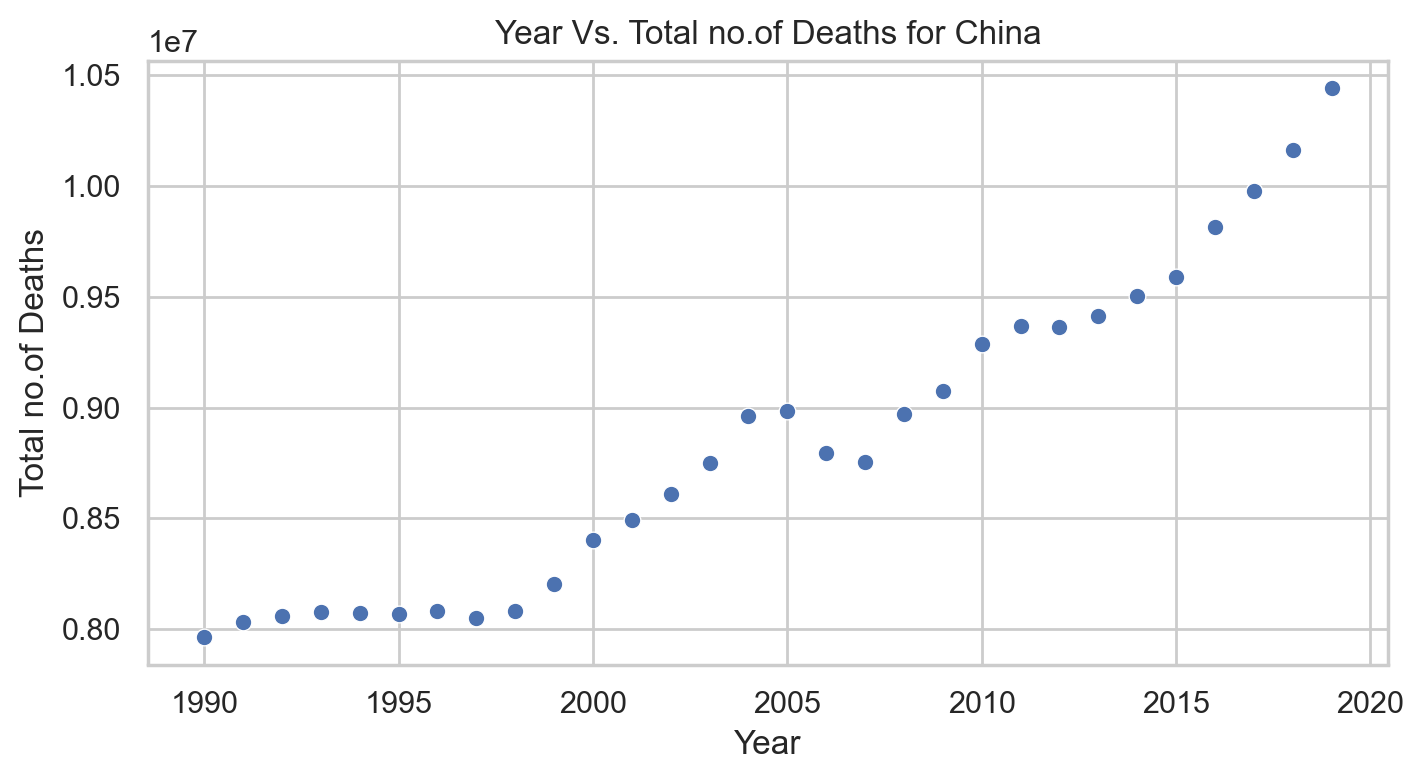

In [31]:
# China - "Total_no_of_Deaths" against "Year"

China_Total_no_of_Deaths = df2[df2['Country/Territory']=='China'].sort_values(by='Total_no_of_Deaths',ascending=False)

plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=China_Total_no_of_Deaths, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for China")
plt.show();

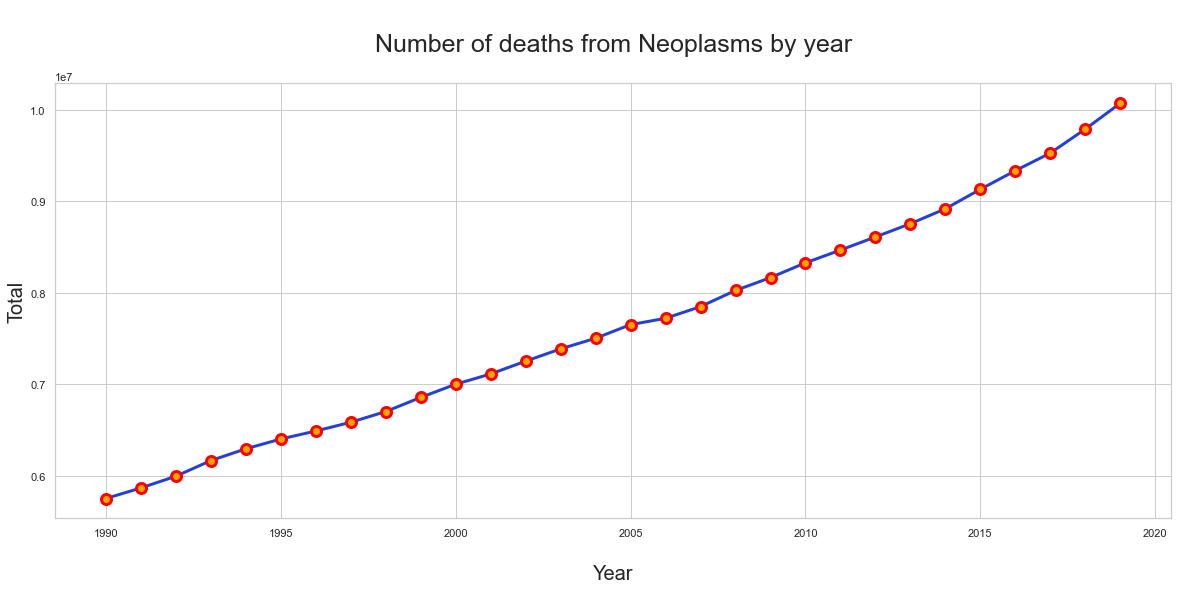

In [38]:
# Cancer
Neoplasms=pd.DataFrame(df2.groupby("Year")["Neoplasms"].sum()).reset_index()
plt.subplots(figsize=(20,8))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})

p=sns.lineplot(x=Neoplasms["Year"],
               y=Neoplasms["Neoplasms"],
               data=Neoplasms,
               color="#2540D5",
               marker="o",linewidth=3,markersize=10,
               markerfacecolor="orange",markeredgecolor="red",markeredgewidth=3)
p.axes.set_title("\nNumber of deaths from Neoplasms by year\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20);

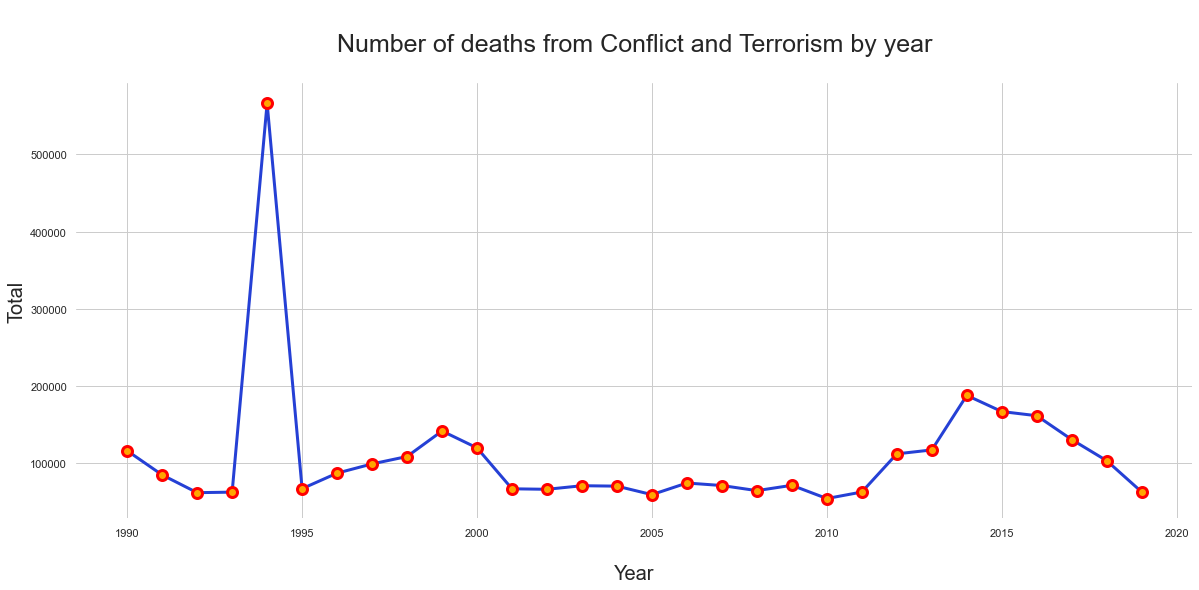

In [32]:
# Conflict/Terrorism
Conflict_Terrorism=pd.DataFrame(df2.groupby("Year")["Conflict and Terrorism"].sum()).reset_index()
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=Conflict_Terrorism["Year"],
               y=Conflict_Terrorism["Conflict and Terrorism"],
               data=Conflict_Terrorism,
               color="#2540D5",
               marker="o",linewidth=3,markersize=10,
               markerfacecolor="orange",markeredgecolor="red",markeredgewidth=3)
p.axes.set_title("\nNumber of deaths from Conflict and Terrorism by year\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()


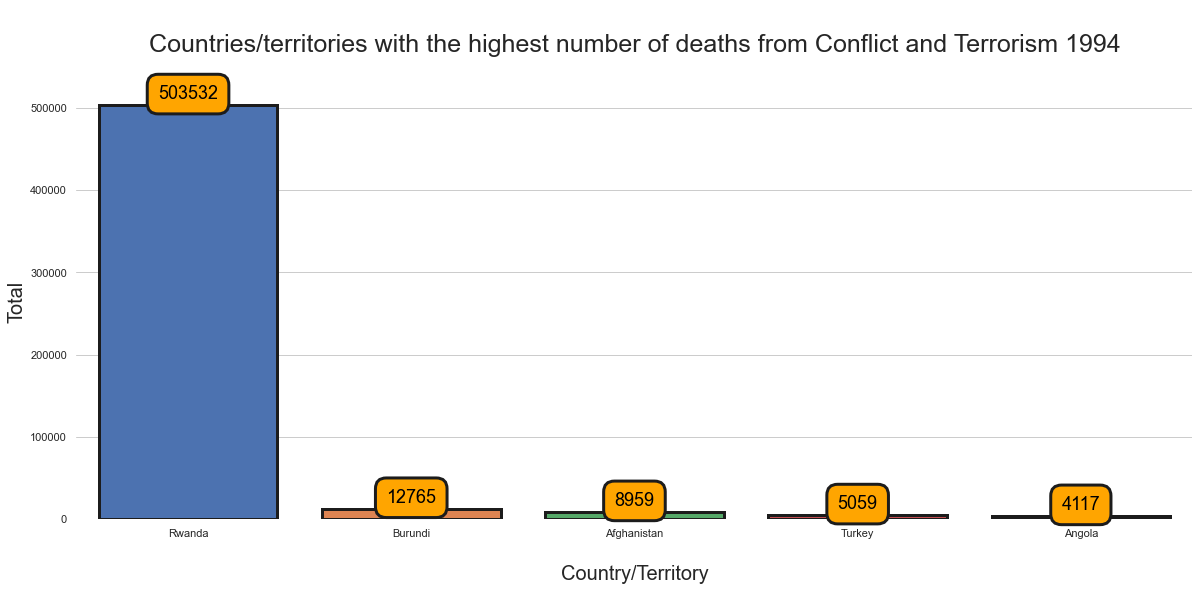

In [35]:
temp=pd.DataFrame(df2.groupby("Year")["Conflict and Terrorism"]).reset_index()
temp=df2[df2["Year"]==1994].sort_values(['Conflict and Terrorism'],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=temp["Country/Territory"][:5],y=temp["Conflict and Terrorism"], saturation=1,edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nCountries/territories with the highest number of deaths from Conflict and Terrorism 1994\n",fontsize=25)
plt.xlabel("\nCountry/Territory",fontsize=20)
plt.ylabel("Total",fontsize=20)
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

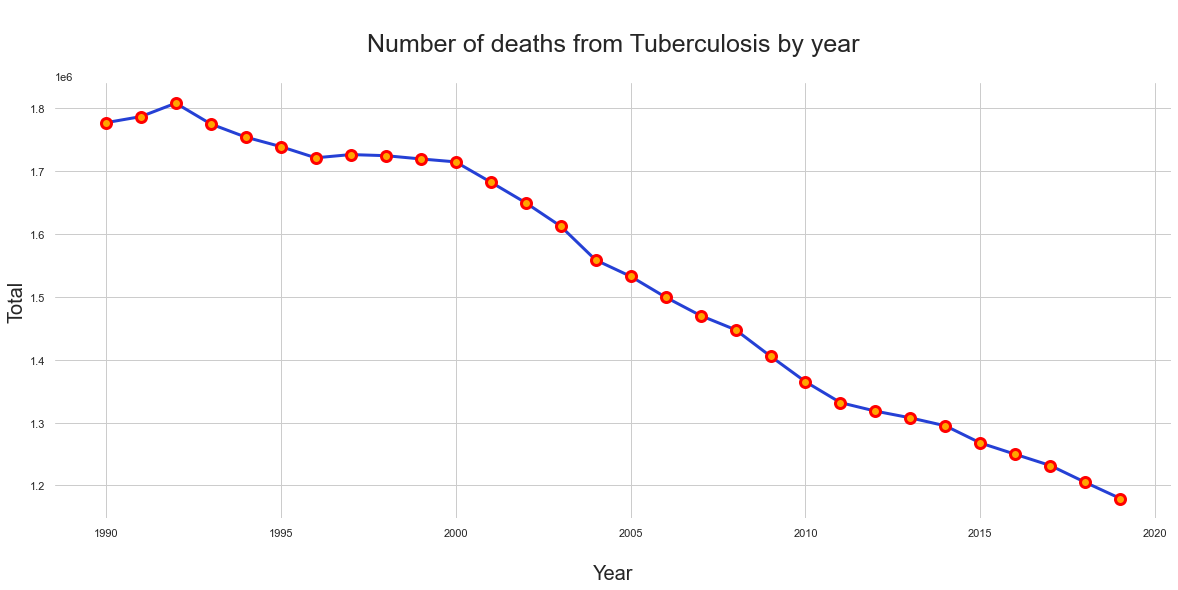

In [36]:
# Number of deaths from Tuberculosis by year
Tuberculosis=pd.DataFrame(df2.groupby("Year")["Tuberculosis"].sum()).reset_index()
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=Tuberculosis["Year"],
               y=Tuberculosis["Tuberculosis"],
               data=Tuberculosis,
               color="#2540D5",
               marker="o",linewidth=3,markersize=10,
               markerfacecolor="orange",markeredgecolor="red",markeredgewidth=3)
p.axes.set_title("\nNumber of deaths from Tuberculosis by year\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

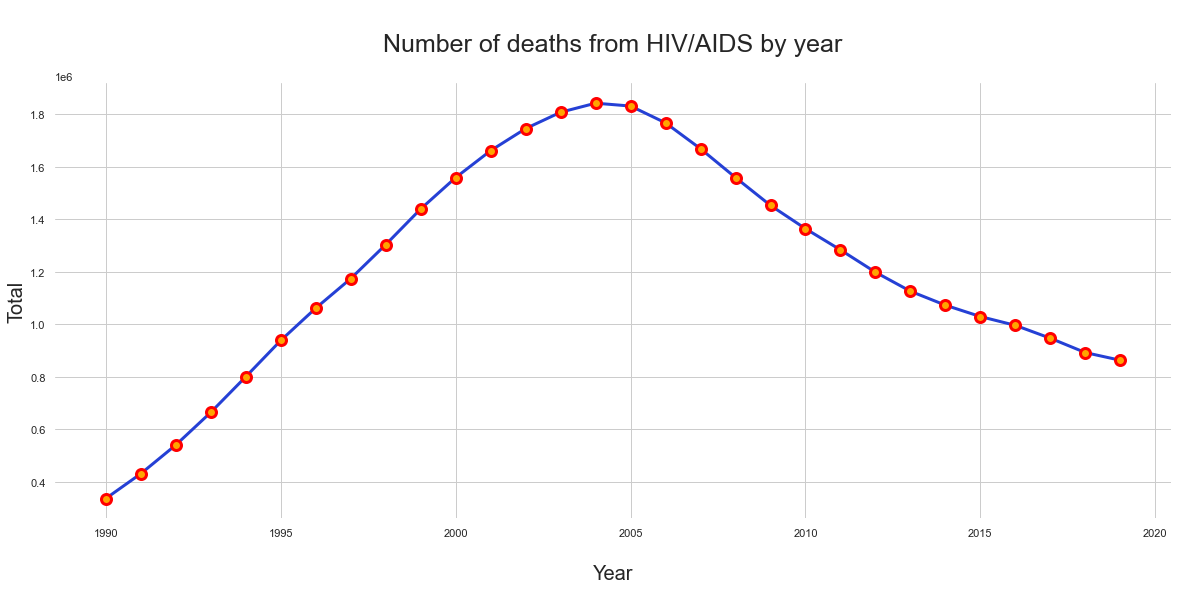

In [37]:
# HIV/AIDS
HIV_AIDS=pd.DataFrame(df2.groupby("Year")["HIV/AIDS"].sum()).reset_index()
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=HIV_AIDS["Year"],
               y=HIV_AIDS["HIV/AIDS"],
               data=HIV_AIDS,
               color="#2540D5",
               marker="o",linewidth=3,markersize=10,
               markerfacecolor="orange",markeredgecolor="red",markeredgewidth=3)
p.axes.set_title("\nNumber of deaths from HIV/AIDS by year\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

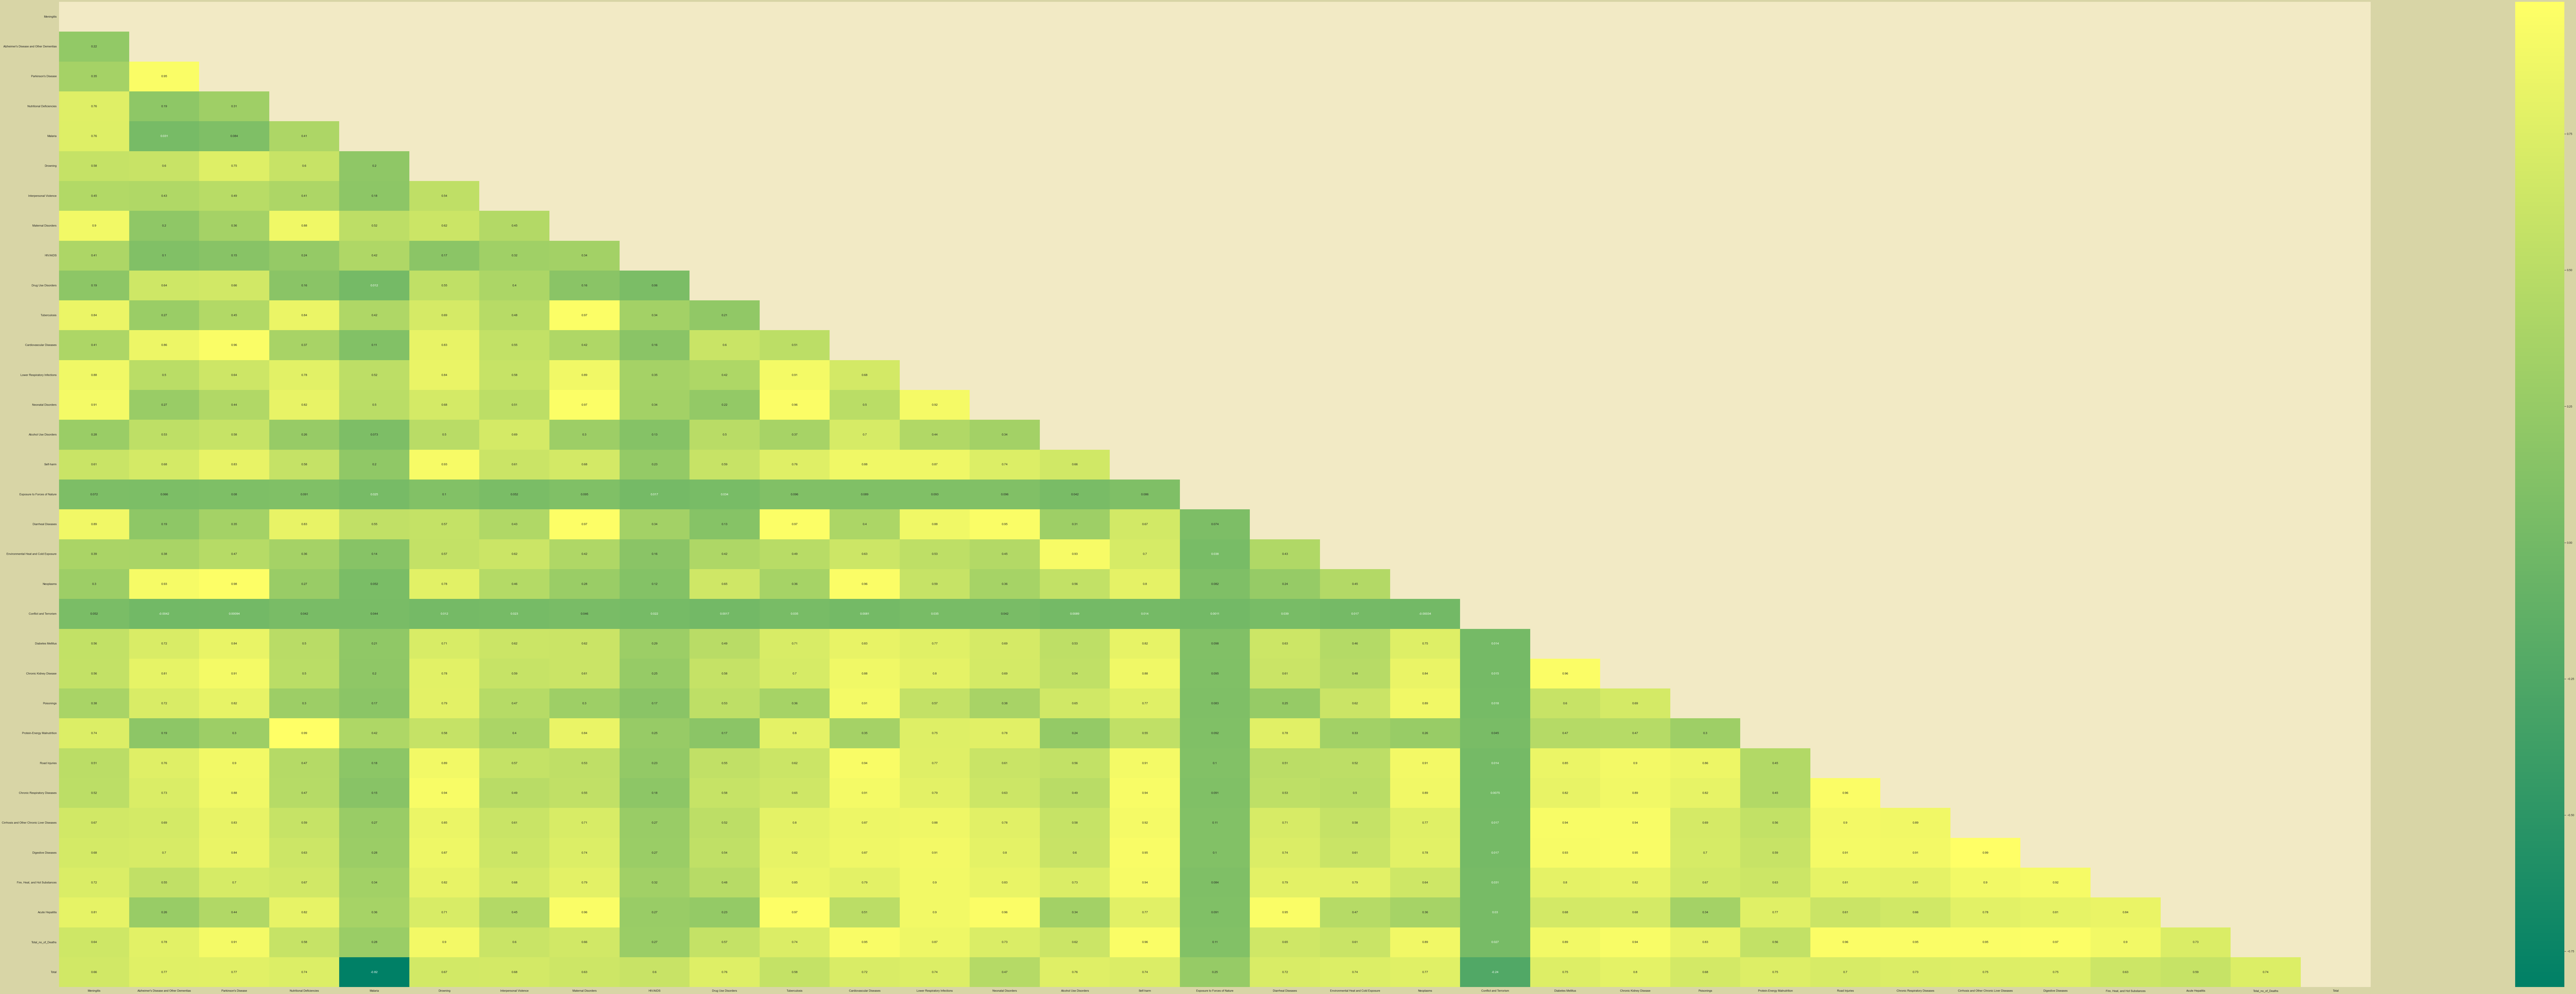

In [51]:
# Check correlation

plt.figure(figsize = (200,70))
sns.heatmap(df2.corr(), annot=True,cmap='summer',mask=np.triu(np.ones_like(df2.corr())))
plt.show()